In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split
from time import time

In [3]:
import sys
try:
    sys.getwindowsversion()
except AttributeError:
    isWindows = False
else:
    isWindows = True
if isWindows:
    import win32api,win32process,win32con
    pid = win32api.GetCurrentProcessId()
    handle = win32api.OpenProcess(win32con.PROCESS_ALL_ACCESS, True, pid)
    win32process.SetPriorityClass(handle, win32process.HIGH_PRIORITY_CLASS)
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn import cross_validation
#from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

%matplotlib inline

In [4]:
directory = 'C:/Users/N1110/Desktop/SMU 2020 SPRING/CORD19/april 15 afternoon/'
df1= pd.read_csv('Train1941_512vectorsWithTitles2.csv')
df1.head()

,title,abstract,Group,0,1,2,3,4,5,6,...,502,503,504,505,506,507,508,509,510,511
0,Selective induction of interleukin-6 in mouse ...,Abstract Astrocytes produce granulocyte/macrop...,G1,0.024093,0.003332,0.026175,-0.056424,0.066987,0.064344,-0.015630,...,-0.030333,-0.068542,0.004144,-0.068533,-0.047693,-0.045203,0.038434,-0.052579,-0.026946,-0.064774
1,The coronavirus avian infectious bronchitis vi...,Abstract Replication of avian infectious bronc...,G5,0.000738,0.028788,0.008383,0.015660,-0.002792,-0.023342,0.039279,...,-0.064577,-0.065933,-0.046359,-0.065978,-0.057970,-0.046468,0.047742,-0.053377,-0.034778,0.007275
2,Effect of sulfhydryl reagents on the infectivi...,Abstract The infectivity of vesicular stomatit...,G1,-0.029008,0.036773,0.016296,-0.066768,0.026380,0.067563,0.040172,...,-0.009418,-0.068801,-0.007311,-0.068773,-0.016543,0.005688,0.041948,-0.049344,-0.005887,-0.032376
3,Further characterization of mouse hepatitis vi...,Abstract Two temporally and enzymatically dist...,G5,0.025092,-0.005877,0.036179,-0.007282,0.044100,0.047946,0.032226,...,-0.057155,-0.065491,-0.047325,-0.065456,-0.027758,-0.018844,0.033387,-0.059728,-0.057004,-0.043818
4,Characterization of Kunjin virus RNA-dependent...,Abstract RNA-dependent RNA polymerase (RDRP) a...,G5,-0.020635,0.030479,-0.051886,-0.055125,-0.052440,0.051107,-0.022648,...,-0.028083,-0.061142,-0.018120,-0.061137,-0.049363,-0.026236,0.053327,-0.014145,-0.046835,-0.060753


In [5]:
df1.shape

(1941, 515)

In [6]:
df1.dtypes

title        object
abstract     object
Group        object
0           float64
1           float64
             ...   
507         float64
508         float64
509         float64
510         float64
511         float64
Length: 515, dtype: object

In [7]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,-0.033354,0.025039,-0.029933,-0.025233,0.016948,0.033986,0.030405,-0.025332,0.009630,0.016360,...,-0.041908,-0.062183,-0.022047,-0.062076,0.022722,-0.019891,0.033020,-0.043147,-0.017537,-0.047506
std,0.030242,0.034592,0.027972,0.030341,0.036274,0.032438,0.032549,0.031832,0.040776,0.034155,...,0.025084,0.003800,0.033338,0.003946,0.034609,0.034151,0.022946,0.021903,0.035407,0.020467
min,-0.073090,-0.064182,-0.067201,-0.076231,-0.067943,-0.063158,-0.073909,-0.066887,-0.074878,-0.065005,...,-0.070765,-0.081105,-0.066845,-0.083125,-0.065105,-0.075116,-0.061486,-0.068634,-0.069124,-0.073304
25%,-0.056988,0.002409,-0.052341,-0.049912,-0.009887,0.020013,0.013695,-0.051979,-0.028134,-0.009272,...,-0.058623,-0.064305,-0.049817,-0.064194,-0.000385,-0.049479,0.021046,-0.057128,-0.047880,-0.059254
50%,-0.046209,0.036926,-0.039104,-0.035005,0.027843,0.048174,0.043775,-0.035518,0.017565,0.024190,...,-0.053042,-0.061603,-0.031897,-0.061564,0.034213,-0.029447,0.038922,-0.051624,-0.027722,-0.056003
75%,-0.015791,0.054346,-0.014463,-0.005188,0.047873,0.057508,0.055454,-0.004598,0.047810,0.046319,...,-0.033597,-0.059599,0.000451,-0.059553,0.051864,0.004885,0.050912,-0.037323,0.009025,-0.044880
max,0.062857,0.072260,0.064023,0.058647,0.067745,0.072100,0.069029,0.062444,0.072816,0.064790,...,0.054437,-0.053319,0.068436,-0.030560,0.071195,0.065397,0.064143,0.060514,0.063298,0.055845


In [8]:
# check missing values
df1.isnull().sum()


title       0
abstract    0
Group       0
0           0
1           0
           ..
507         0
508         0
509         0
510         0
511         0
Length: 515, dtype: int64

In [9]:
# df1.hist(column='Group', bins=50)
df1['Group'].value_counts()

G1    679
G0    456
G5    411
G4    222
G3    132
G2     41
Name: Group, dtype: int64

In [10]:
df_imputed=df1.drop(['title', 'abstract'], axis=1)
df_imputed


,Group,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,G1,0.024093,0.003332,0.026175,-0.056424,0.066987,0.064344,-0.015630,-0.065082,0.063505,...,-0.030333,-0.068542,0.004144,-0.068533,-0.047693,-0.045203,0.038434,-0.052579,-0.026946,-0.064774
1,G5,0.000738,0.028788,0.008383,0.015660,-0.002792,-0.023342,0.039279,-0.006778,-0.046869,...,-0.064577,-0.065933,-0.046359,-0.065978,-0.057970,-0.046468,0.047742,-0.053377,-0.034778,0.007275
2,G1,-0.029008,0.036773,0.016296,-0.066768,0.026380,0.067563,0.040172,-0.060464,-0.026711,...,-0.009418,-0.068801,-0.007311,-0.068773,-0.016543,0.005688,0.041948,-0.049344,-0.005887,-0.032376
3,G5,0.025092,-0.005877,0.036179,-0.007282,0.044100,0.047946,0.032226,0.004009,0.051182,...,-0.057155,-0.065491,-0.047325,-0.065456,-0.027758,-0.018844,0.033387,-0.059728,-0.057004,-0.043818
4,G5,-0.020635,0.030479,-0.051886,-0.055125,-0.052440,0.051107,-0.022648,-0.009215,0.052870,...,-0.028083,-0.061142,-0.018120,-0.061137,-0.049363,-0.026236,0.053327,-0.014145,-0.046835,-0.060753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,G4,-0.044237,-0.020313,-0.048073,-0.056209,0.043061,0.056523,-0.000632,0.027694,0.040570,...,-0.058062,-0.058796,-0.045975,-0.058796,0.050993,-0.033669,0.041798,-0.057656,-0.012462,-0.054203
1937,G5,-0.035588,0.058073,-0.050484,-0.037032,0.016111,0.060505,0.057046,-0.047282,0.031583,...,-0.059808,-0.061199,-0.018811,-0.061199,-0.020907,-0.026319,0.028944,-0.047205,-0.041322,-0.023640
1938,G0,-0.060424,-0.000134,-0.058672,-0.038685,0.032710,0.027704,-0.024062,-0.059046,0.029137,...,-0.061882,-0.062241,-0.037259,-0.062241,0.039949,0.027875,0.060479,-0.058036,-0.061445,-0.058604
1939,G0,-0.013489,0.049279,-0.059444,-0.058115,-0.059752,-0.035380,0.058563,-0.054313,0.057236,...,-0.059849,-0.062269,-0.055467,-0.062269,0.023908,-0.041097,0.012535,-0.033178,-0.048842,-0.040750


In [11]:
df=df_imputed 
df= pd.concat([df, pd.get_dummies(df['Group'])], axis=1)

In [12]:
df

,Group,0,1,2,3,4,5,6,7,8,...,508,509,510,511,G0,G1,G2,G3,G4,G5
0,G1,0.024093,0.003332,0.026175,-0.056424,0.066987,0.064344,-0.015630,-0.065082,0.063505,...,0.038434,-0.052579,-0.026946,-0.064774,0,1,0,0,0,0
1,G5,0.000738,0.028788,0.008383,0.015660,-0.002792,-0.023342,0.039279,-0.006778,-0.046869,...,0.047742,-0.053377,-0.034778,0.007275,0,0,0,0,0,1
2,G1,-0.029008,0.036773,0.016296,-0.066768,0.026380,0.067563,0.040172,-0.060464,-0.026711,...,0.041948,-0.049344,-0.005887,-0.032376,0,1,0,0,0,0
3,G5,0.025092,-0.005877,0.036179,-0.007282,0.044100,0.047946,0.032226,0.004009,0.051182,...,0.033387,-0.059728,-0.057004,-0.043818,0,0,0,0,0,1
4,G5,-0.020635,0.030479,-0.051886,-0.055125,-0.052440,0.051107,-0.022648,-0.009215,0.052870,...,0.053327,-0.014145,-0.046835,-0.060753,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,G4,-0.044237,-0.020313,-0.048073,-0.056209,0.043061,0.056523,-0.000632,0.027694,0.040570,...,0.041798,-0.057656,-0.012462,-0.054203,0,0,0,0,1,0
1937,G5,-0.035588,0.058073,-0.050484,-0.037032,0.016111,0.060505,0.057046,-0.047282,0.031583,...,0.028944,-0.047205,-0.041322,-0.023640,0,0,0,0,0,1
1938,G0,-0.060424,-0.000134,-0.058672,-0.038685,0.032710,0.027704,-0.024062,-0.059046,0.029137,...,0.060479,-0.058036,-0.061445,-0.058604,1,0,0,0,0,0
1939,G0,-0.013489,0.049279,-0.059444,-0.058115,-0.059752,-0.035380,0.058563,-0.054313,0.057236,...,0.012535,-0.033178,-0.048842,-0.040750,1,0,0,0,0,0


In [13]:
df.drop(["Group"],inplace=True,axis=1)

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,G0,G1,G2,G3,G4,G5
0,0.024093,0.003332,0.026175,-0.056424,0.066987,0.064344,-0.015630,-0.065082,0.063505,0.056236,...,0.038434,-0.052579,-0.026946,-0.064774,0,1,0,0,0,0
1,0.000738,0.028788,0.008383,0.015660,-0.002792,-0.023342,0.039279,-0.006778,-0.046869,0.049305,...,0.047742,-0.053377,-0.034778,0.007275,0,0,0,0,0,1
2,-0.029008,0.036773,0.016296,-0.066768,0.026380,0.067563,0.040172,-0.060464,-0.026711,0.045009,...,0.041948,-0.049344,-0.005887,-0.032376,0,1,0,0,0,0
3,0.025092,-0.005877,0.036179,-0.007282,0.044100,0.047946,0.032226,0.004009,0.051182,0.061461,...,0.033387,-0.059728,-0.057004,-0.043818,0,0,0,0,0,1
4,-0.020635,0.030479,-0.051886,-0.055125,-0.052440,0.051107,-0.022648,-0.009215,0.052870,0.054331,...,0.053327,-0.014145,-0.046835,-0.060753,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,-0.044237,-0.020313,-0.048073,-0.056209,0.043061,0.056523,-0.000632,0.027694,0.040570,0.014897,...,0.041798,-0.057656,-0.012462,-0.054203,0,0,0,0,1,0
1937,-0.035588,0.058073,-0.050484,-0.037032,0.016111,0.060505,0.057046,-0.047282,0.031583,0.021085,...,0.028944,-0.047205,-0.041322,-0.023640,0,0,0,0,0,1
1938,-0.060424,-0.000134,-0.058672,-0.038685,0.032710,0.027704,-0.024062,-0.059046,0.029137,-0.008186,...,0.060479,-0.058036,-0.061445,-0.058604,1,0,0,0,0,0
1939,-0.013489,0.049279,-0.059444,-0.058115,-0.059752,-0.035380,0.058563,-0.054313,0.057236,-0.007523,...,0.012535,-0.033178,-0.048842,-0.040750,1,0,0,0,0,0


In [15]:
NUM_ESTIMATORS = 100
NO_JOBS = 4
RANDOM_STATE = 2000  

In [16]:
      
        
# from sklearn.ensemble import RandomForestClassifier
# rf_clfBASE = RandomForestClassifier(  random_state = RANDOM_STATE, criterion = 'gini', 
#                                 n_estimators = NUM_ESTIMATORS, verbose = False, n_jobs = NO_JOBS)
# rf_clfBASE.fit(X_train_scaled,y_train)



# rf_clf = RandomForestClassifier(  random_state = RANDOM_STATE, criterion = 'gini', min_samples_split=10,min_samples_leaf=1,
#                                 max_features='sqrt', max_depth=50, bootstrap = False,
#                                 n_estimators = 1800, verbose = False, n_jobs = NO_JOBS)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
#rf=RandomForestClassifier(n_estimators=100,criterion='entropy',n_jobs=4) #n_jobs=-1
# rf=RandomForestClassifier(  random_state = RANDOM_STATE, criterion = 'gini', 
#                                 n_estimators = NUM_ESTIMATORS, verbose = False, n_jobs = NO_JOBS)
rf=RandomForestClassifier(  random_state = RANDOM_STATE, criterion = 'gini', min_samples_split=10,min_samples_leaf=1,
                                max_features='sqrt', max_depth=50, bootstrap = False,
                                n_estimators = 1800, verbose = False, n_jobs = NO_JOBS)
rf_Kfold=KFold(n_splits=3)

In [18]:
groups=["G0","G1","G2","G3","G4","G5"]
y=df[groups]
x=df.drop(groups,axis=1)

In [19]:
df.drop(groups,axis=1)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.024093,0.003332,0.026175,-0.056424,0.066987,0.064344,-0.015630,-0.065082,0.063505,0.056236,...,-0.030333,-0.068542,0.004144,-0.068533,-0.047693,-0.045203,0.038434,-0.052579,-0.026946,-0.064774
1,0.000738,0.028788,0.008383,0.015660,-0.002792,-0.023342,0.039279,-0.006778,-0.046869,0.049305,...,-0.064577,-0.065933,-0.046359,-0.065978,-0.057970,-0.046468,0.047742,-0.053377,-0.034778,0.007275
2,-0.029008,0.036773,0.016296,-0.066768,0.026380,0.067563,0.040172,-0.060464,-0.026711,0.045009,...,-0.009418,-0.068801,-0.007311,-0.068773,-0.016543,0.005688,0.041948,-0.049344,-0.005887,-0.032376
3,0.025092,-0.005877,0.036179,-0.007282,0.044100,0.047946,0.032226,0.004009,0.051182,0.061461,...,-0.057155,-0.065491,-0.047325,-0.065456,-0.027758,-0.018844,0.033387,-0.059728,-0.057004,-0.043818
4,-0.020635,0.030479,-0.051886,-0.055125,-0.052440,0.051107,-0.022648,-0.009215,0.052870,0.054331,...,-0.028083,-0.061142,-0.018120,-0.061137,-0.049363,-0.026236,0.053327,-0.014145,-0.046835,-0.060753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,-0.044237,-0.020313,-0.048073,-0.056209,0.043061,0.056523,-0.000632,0.027694,0.040570,0.014897,...,-0.058062,-0.058796,-0.045975,-0.058796,0.050993,-0.033669,0.041798,-0.057656,-0.012462,-0.054203
1937,-0.035588,0.058073,-0.050484,-0.037032,0.016111,0.060505,0.057046,-0.047282,0.031583,0.021085,...,-0.059808,-0.061199,-0.018811,-0.061199,-0.020907,-0.026319,0.028944,-0.047205,-0.041322,-0.023640
1938,-0.060424,-0.000134,-0.058672,-0.038685,0.032710,0.027704,-0.024062,-0.059046,0.029137,-0.008186,...,-0.061882,-0.062241,-0.037259,-0.062241,0.039949,0.027875,0.060479,-0.058036,-0.061445,-0.058604
1939,-0.013489,0.049279,-0.059444,-0.058115,-0.059752,-0.035380,0.058563,-0.054313,0.057236,-0.007523,...,-0.059849,-0.062269,-0.055467,-0.062269,0.023908,-0.041097,0.012535,-0.033178,-0.048842,-0.040750


In [20]:
x.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
507    float64
508    float64
509    float64
510    float64
511    float64
Length: 512, dtype: object

In [36]:
x.shape

(1941, 512)

In [43]:
type(x)

pandas.core.frame.DataFrame

In [21]:
y

,G0,G1,G2,G3,G4,G5
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,0,1,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
1936,0,0,0,0,1,0
1937,0,0,0,0,0,1
1938,1,0,0,0,0,0
1939,1,0,0,0,0,0


In [22]:
rf_oof_predict=np.zeros([x.shape[0],6])
rf_oof_predict

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [23]:
x=x.fillna(0)

In [24]:
#rf_oof_predict=np.zeros(x.shape[0])
for train_idx, test_idx in rf_Kfold.split(x):
    rf.fit(x.loc[train_idx],y.loc[train_idx])
    rf_oof_predict[test_idx]=rf.predict(x.loc[test_idx])
    print(classification_report(y.loc[test_idx],rf_oof_predict[test_idx]))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       137
           1       0.84      0.66      0.74       230
           2       1.00      0.14      0.25         7
           3       0.00      0.00      0.00        52
           4       0.94      0.15      0.26       112
           5       0.86      0.77      0.81       109

   micro avg       0.86      0.54      0.66       647
   macro avg       0.75      0.41      0.47       647
weighted avg       0.80      0.54      0.61       647
 samples avg       0.54      0.54      0.54       647

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       207
           1       0.92      0.72      0.81       250
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        37
           4       0.88      0.58      0.70        64
           5       0.94      0.69      0.80        74

   micro avg       0.94

In [25]:
print(classification_report(y,rf_oof_predict))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       456
           1       0.87      0.69      0.77       679
           2       1.00      0.02      0.05        41
           3       0.00      0.00      0.00       132
           4       0.91      0.35      0.51       222
           5       0.92      0.75      0.83       411

   micro avg       0.90      0.63      0.74      1941
   macro avg       0.77      0.44      0.50      1941
weighted avg       0.84      0.63      0.70      1941
 samples avg       0.63      0.63      0.63      1941



In [26]:
pred=np.einsum('i,...i',np.array([0,1,2,3,4,5]),rf_oof_predict)
truth=np.einsum('i,...i',np.array([0,1,2,3,4,5]),y)

In [27]:
pred[0:20]

array([1., 0., 0., 5., 0., 5., 5., 0., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5.])

In [28]:
truth[0:20]

array([1, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5])

Confusion matrix, without normalization
[[449   7   0   0   0   0]
 [195 468   0   0   2  14]
 [ 32   8   1   0   0   0]
 [ 94  21   0   0   6  11]
 [128  15   0   0  78   1]
 [ 84  20   0   0   0 307]]
Normalized confusion matrix
[[0.98 0.02 0.   0.   0.   0.  ]
 [0.29 0.69 0.   0.   0.   0.02]
 [0.78 0.2  0.02 0.   0.   0.  ]
 [0.71 0.16 0.   0.   0.05 0.08]
 [0.58 0.07 0.   0.   0.35 0.  ]
 [0.2  0.05 0.   0.   0.   0.75]]


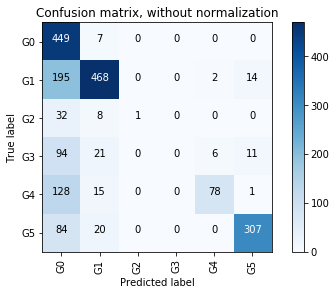

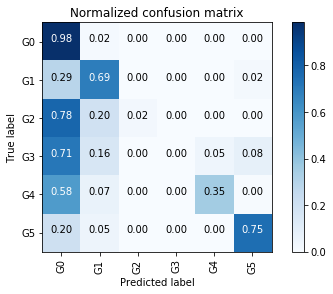

In [29]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
class_names=["G0","G1","G2","G3","G4","G5"]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(truth, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Predict Hold Out dataset (new papers, no label)

In [40]:
df2= pd.read_csv('HoldOut388_512vectors2WithTitles.csv')
df2.head()

,title,abstract,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
0,Synthesis of virus-specific RNA in permeabiliz...,Abstract We have developed a permeabilized cel...,-0.049652,-0.011094,-0.026801,-0.002311,0.042196,0.021205,-0.003560,0.020746,...,-0.056881,-0.070640,-0.017600,-0.070502,-0.000305,-0.008354,0.054538,-0.007377,-0.035350,-0.052909
1,Primary structure and post-translational proce...,Abstract The nucleotide sequence of the peplom...,0.002379,0.018184,-0.040164,-0.030494,0.008339,0.061669,-0.012344,-0.002478,...,-0.051405,-0.065164,-0.010036,-0.065149,0.049234,-0.030314,0.048964,0.011794,-0.028852,-0.064704
2,Comparison of the genome organization of toro-...,"Abstract Recently, toroviruses and coronavirus...",-0.036349,-0.000761,-0.050869,-0.034782,0.035800,0.060601,0.005766,-0.029210,...,0.035874,-0.063528,-0.059635,-0.063528,0.034254,-0.030137,0.043699,-0.005431,0.057524,-0.056803
3,The complete sequence (22 kilobases) of murine...,"Abstract The 5′-most gene, gene 1, of the geno...",0.007206,-0.013924,-0.027915,0.040264,0.007304,0.058013,-0.036737,0.023549,...,-0.057039,-0.058295,-0.052740,-0.058295,0.014025,-0.054457,0.053144,-0.055570,0.049414,-0.057258
4,De novo generation of defective interfering RN...,Abstract Defective interfering (DI) RNAs were ...,-0.049280,-0.035973,-0.050783,-0.031401,0.031795,0.059310,0.052120,0.020553,...,-0.010444,-0.062296,-0.037243,-0.062295,-0.053315,-0.030183,0.038881,-0.047072,0.060653,-0.056800


In [42]:
df_imputed2=df2.drop(['title', 'abstract'], axis=1)
df_imputed2

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.049652,-0.011094,-0.026801,-0.002311,0.042196,0.021205,-0.003560,0.020746,0.045434,0.025883,...,-0.056881,-0.070640,-0.017600,-0.070502,-0.000305,-0.008354,0.054538,-0.007377,-0.035350,-0.052909
1,0.002379,0.018184,-0.040164,-0.030494,0.008339,0.061669,-0.012344,-0.002478,0.036577,0.026191,...,-0.051405,-0.065164,-0.010036,-0.065149,0.049234,-0.030314,0.048964,0.011794,-0.028852,-0.064704
2,-0.036349,-0.000761,-0.050869,-0.034782,0.035800,0.060601,0.005766,-0.029210,0.022040,0.053824,...,0.035874,-0.063528,-0.059635,-0.063528,0.034254,-0.030137,0.043699,-0.005431,0.057524,-0.056803
3,0.007206,-0.013924,-0.027915,0.040264,0.007304,0.058013,-0.036737,0.023549,0.011380,0.048981,...,-0.057039,-0.058295,-0.052740,-0.058295,0.014025,-0.054457,0.053144,-0.055570,0.049414,-0.057258
4,-0.049280,-0.035973,-0.050783,-0.031401,0.031795,0.059310,0.052120,0.020553,0.001214,0.057714,...,-0.010444,-0.062296,-0.037243,-0.062295,-0.053315,-0.030183,0.038881,-0.047072,0.060653,-0.056800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.000114,0.058478,-0.004469,-0.063835,0.006031,0.020011,0.008401,-0.063798,0.057093,-0.025551,...,-0.015296,-0.067067,-0.012751,-0.067071,-0.028087,-0.046303,0.056527,-0.058321,-0.019072,-0.036170
384,-0.048442,-0.035224,-0.057540,-0.035870,0.056764,0.058271,0.055362,-0.055081,0.045430,0.043651,...,-0.032115,-0.061738,-0.052958,-0.061738,0.044325,-0.048101,0.059945,-0.059864,-0.048209,-0.052417
385,-0.038116,-0.015935,-0.051716,0.026050,0.053225,0.058031,0.043148,-0.037475,0.028737,0.049610,...,-0.040447,-0.061073,-0.030382,-0.061073,0.006920,-0.007703,0.049406,-0.058802,-0.046988,-0.056345
386,-0.055184,0.056014,-0.050239,0.027768,-0.047458,-0.010766,0.043399,-0.054596,-0.028848,-0.024939,...,-0.037741,-0.056081,-0.044042,-0.056081,0.054785,-0.054763,0.039602,0.006800,0.003140,-0.056081


In [44]:
x_test=df_imputed2
x_test.shape

(388, 512)

In [45]:
type(x_test)

pandas.core.frame.DataFrame

In [46]:
preds=rf.predict(x_test)
preds

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=uint8)

In [47]:
# prediction
# array([[0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        ...,
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 0],
#        [1, 0, 0, 0, 0, 0]]




#??#        [0, 0, 0, 0, 0, 0],

## Validation method 1
### There is no true labels for the test dataset. So it is necessary to read the abstracts to verify if it really belong to the class that assigned

#### From previous topic modeling, we got the topics for each group

### Topics:
#### G0 flu children clinical
#### G1 gene protein cell 
#### G2 bat host phylogenetic 
#### G3 SARS COV MERS COV
#### G4 diganosis asssay detection 
#### G5 RdRp RNA replication

#### 0: predicted as group G5
    Abstract We have developed a permeabilized cell system for assaying mouse hepatitis virus-specific RNA polymerase activity. This activity was characterized as to its requirements for mono- and divalent cations, requirements for an exogenous energy source, and pH optimum. This system faithfully reflects MHV-specific RNA synthesis in the intact cell, with regard to both its time of appearance during the course of infection and the products synthesized. The system is efficient and the RNA products were identical to those observed in intact MHV-infected cells as judged by agarose gel electrophoresis and hybridization. Permeabilized cells appear to be an ideal system for studying coronavirus RNA synthesis since they closely mimic in vivo conditions while allowing much of the experimental flexibility of truly cell-free systems.
    
#### 1: predicted as group G5
    Abstract The nucleotide sequence of the peplomer (P) protein gene of Berne virus (BEV), the torovirus prototype, was determined. The gene encodes an apoprotein of 1581 amino acids with an Mr of about 178K. The open reading frame was cloned behind the T7 RNA polymerase promoter and its translation product was identified as the BEV P protein precursor by in vivo expression and immunoprecipitation. The deduced amino acid sequence contains a number of domains which are typical for type I membrane glycoproteins: an N-terminal signal sequence, a putative C-terminal transmembrane anchor, and a cytoplasmic tail. Eighteen potential N-glycosylation sites, two heptad repeat domains, and a possible â€œtrypsin-likeâ€ cleavage site were identified. The mature P protein consists of two subunits and their electrophoretic mobility upon endoglycosidase F treatment strongly suggests that the predicted cleavage site is functional in vivo. The heptad repeat domains are probably involved in the generation of an intra-chain coiled-coil secondary structure; similar inter-chain interactions can play a role in P protein oligomerization. Using a sucrose gradient assay the P protein was indeed shown to form dimers. The intra- and inter-chain coiled-coil interactions may stabilize the elongated BEV peplomers.
    
    
#### second from last: predicted as group ? #??#        [0, 0, 0, 0, 0, 0],
    Summary Background An ongoing outbreak of pneumonia associated with a novel coronavirus was reported in Wuhan city, Hubei province, China. Affected patients were geographically linked with a local wet market as a potential source. No data on person-to-person or nosocomial transmission have been published to date. Methods In this study, we report the epidemiological, clinical, laboratory, radiological, and microbiological findings of five patients in a family cluster who presented with unexplained pneumonia after returning to Shenzhen, Guangdong province, China, after a visit to Wuhan, and an additional family member who did not travel to Wuhan. Phylogenetic analysis of genetic sequences from these patients were done. Findings From Jan 10, 2020, we enrolled a family of six patients who travelled to Wuhan from Shenzhen between Dec 29, 2019 and Jan 4, 2020. Of six family members who travelled to Wuhan, five were identified as infected with the novel coronavirus. Additionally, one family member, who did not travel to Wuhan, became infected with the virus after several days of contact with four of the family members. None of the family members had contacts with Wuhan markets or animals, although two had visited a Wuhan hospital. Five family members (aged 36â€“66 years) presented with fever, upper or lower respiratory tract symptoms, or diarrhoea, or a combination of these 3â€“6 days after exposure. They presented to our hospital (The University of Hong Kong-Shenzhen Hospital, Shenzhen) 6â€“10 days after symptom onset. They and one asymptomatic child (aged 10 years) had radiological ground-glass lung opacities. Older patients (aged >60 years) had more systemic symptoms, extensive radiological ground-glass lung changes, lymphopenia, thrombocytopenia, and increased C-reactive protein and lactate dehydrogenase levels. The nasopharyngeal or throat swabs of these six patients were negative for known respiratory microbes by point-of-care multiplex RT-PCR, but five patients (four adults and the child) were RT-PCR positive for genes encoding the internal RNA-dependent RNA polymerase and surface Spike protein of this novel coronavirus, which were confirmed by Sanger sequencing. Phylogenetic analysis of these five patients' RT-PCR amplicons and two full genomes by next-generation sequencing showed that this is a novel coronavirus, which is closest to the bat severe acute respiatory syndrome (SARS)-related coronaviruses found in Chinese horseshoe bats. Interpretation Our findings are consistent with person-to-person transmission of this novel coronavirus in hospital and family settings, and the reports of infected travellers in other geographical regions. Funding The Shaw Foundation Hong Kong, Michael Seak-Kan Tong, Respiratory Viral Research Foundation Limited, Hui Ming, Hui Hoy and Chow Sin Lan Charity Fund Limited, Marina Man-Wai Lee, the Hong Kong Hainan Commercial Association South China Microbiology Research Fund, Sanming Project of Medicine (Shenzhen), and High Level-Hospital Program (Guangdong Health Commission).
    
#### last: predicted as group G0
    BACKGROUND: Chronic lung allograft dysfunction (CLAD) is the major limiting factor for long-term survival in lung transplant recipients. Viral respiratory tract infection (VRTI) has been previously associated with CLAD development. The main purpose of this study was to evaluate the long-term effects of VRTI during the first year after lung transplantation in relation to CLAD development. METHOD: Ninety-eight patients undergoing lung transplantation were prospectively enrolled between 2009 and 2012. They were monitored for infections with predefined intervals and on extra visits during the first year, the total follow-up period ranged between 5 and 8 years. Nasopharyngeal swab and bronchoalveolar lavage samples were analyzed using a multiplex polymerase chain reaction panel for respiratory pathogens. Data regarding clinical characteristics and infectious events were recorded. RESULTS: Viral respiratory tract infection during the first year was identified as a risk factor for long-term CLAD development (P = 0.041, hazard ratio 1.94 [1.03-3.66]) in a time-dependent multivariate Cox regression analysis. We also found that coronavirus in particular was associated with increased risk for CLAD development. Other identified risk factors were acute rejection and cyclosporine treatment. CONCLUSIONS: This study suggests that VRTI during the first year after lung transplantation is associated with long-term CLAD development and that coronavirus infections in particular might be a risk factor.

In [53]:
pred20=preds[0:20] #more preds
preds[0:20]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [55]:
max_index = np.argmax(pred20, axis=1)
max_index

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5],
      dtype=int64)

#### no 11 predicted as G1

Abstract Total RNA extracted from both white and gray matter of brain tissue from multiple sclerosis (MS) patients and controls was analyzed using a reverse transcription-polymerase chain reaction for the presence of the nucleic acid of human coronavirus (HCV) 229E and OC43, the two strains characterized to date and associated with respiratory infections. HCV-229E viral RNA was detectable in the central nervous system tissue of 4 of 11 MS patients and in none of 6 neurological and 5 normal controls. No HCV-OC43 nucleic acid was detected in any of the specimens. These results suggest a neurotropism on the part of the 229E strain of human coronavirus and underline the importance of further studies on its tissue distribution. The fact that it was detected only in tissue from MS patients illustrates the need for continued studies on the possible role of coronaviruses in the etiology of MS.

In [56]:
pred40=preds[21:40]
preds[21:40]

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

In [58]:
max_index2 = np.argmax(pred40, axis=1)
max_index2

array([1, 1, 5, 1, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4],
      dtype=int64)

In [59]:
max_indexAll = np.argmax(preds, axis=1)
max_indexAll

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5, 5, 1,
       1, 5, 1, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4, 3, 1, 5, 5,
       1, 4, 1, 0, 1, 4, 1, 1, 0, 4, 0, 1, 5, 0, 4, 1, 5, 1, 5, 3, 5, 5,
       1, 5, 5, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4, 5, 1, 1, 5, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 5, 1, 1, 1, 1, 5, 0, 0, 5, 4, 1, 0, 1, 1,
       4, 1, 0, 4, 4, 1, 4, 4, 3, 0, 1, 0, 0, 4, 1, 0, 5, 1, 3, 1, 3, 1,
       0, 5, 1, 5, 3, 5, 1, 1, 1, 5, 4, 0, 1, 1, 4, 4, 4, 0, 4, 1, 0, 0,
       1, 0, 0, 3, 5, 2, 0, 1, 1, 0, 4, 1, 3, 0, 0, 5, 1, 1, 0, 0, 5, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 4, 5, 0, 5, 1, 0, 1,
       5, 0, 5, 1, 5, 1, 1, 5, 1, 5, 1, 0, 5, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       5, 1, 1, 1, 5, 0, 5, 1, 1, 0, 1, 0, 1, 5, 1, 4, 5, 1, 0, 1, 1, 5,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 5, 0, 5, 0, 1, 5, 5, 5, 0, 0, 1,
       4, 1, 5, 5, 0, 0, 5, 1, 5, 5, 1, 0, 5, 4, 0, 5, 1, 5, 1, 1, 1, 0,
       1, 1, 5, 5, 1, 5, 5, 1, 1, 0, 1, 0, 0, 5, 0,